In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import numpy as np
import librosa
import pydub
import matplotlib.pyplot as plt
import copy

from app.detection import detection

In [10]:
import importlib
importlib.reload(detection)

<module 'app.detection.detection' from '/home/ghager/dev/learning/TempoRun/app/detection/detection.py'>

In [2]:
AUDIOPATH1 = "/home/ghager/dev/learning/TempoRun/audio/06 We Could Forever.m4a"
AUDIOPATH2 = "/home/ghager/dev/learning/TempoRun/audio/11 Animals.m4a"

In [3]:
audio1 = pydub.AudioSegment.from_file(AUDIOPATH1)
audio2 = pydub.AudioSegment.from_file(AUDIOPATH2)

In [4]:
audio1_firsthalf = audio1[:len(audio1)//4]
audio2_secondhalf = audio2[:len(audio2)//4]
audio3 = audio1_firsthalf + audio2_secondhalf

In [5]:
global_tempo1 = detection.get_global_tempo(audio1)
global_tempo2 = detection.get_global_tempo(audio2)
global_tempo3 = detection.get_global_tempo(audio3)

print(global_tempo1, global_tempo2, global_tempo3)

117.45383522727273 67.11647727272727 129.19921875


In [6]:
periodic_tempo1 = detection.get_periodic_tempo(audio1, 100)
periodic_tempo2 = detection.get_periodic_tempo(audio2, 100)
periodic_tempo3 = detection.get_periodic_tempo(audio3, 100)

In [11]:
periodic_tempo_plp1 = detection.get_periodic_tempo(audio1, 100, "plp")
periodic_tempo_plp2 = detection.get_periodic_tempo(audio2, 100, "plp")
periodic_tempo_plp3 = detection.get_periodic_tempo(audio3, 100, "plp")

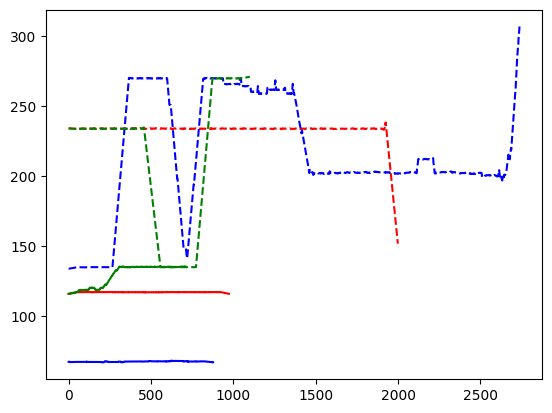

In [12]:
plt.plot(periodic_tempo1, color='r')
plt.plot(periodic_tempo2, color='b')
plt.plot(periodic_tempo3, color='g')
plt.plot(periodic_tempo_plp1, color='r', linestyle='--')
plt.plot(periodic_tempo_plp2, color='b', linestyle='--')
plt.plot(periodic_tempo_plp3, color='g', linestyle='--')

In [ ]:
from pydub import playback

In [ ]:
signal = np.array(audio1.get_array_of_samples(), dtype=np.float32)

In [16]:
plp = detection.get_beat_times_plp(audio1)
beat = detection.get_beat_times(audio1)

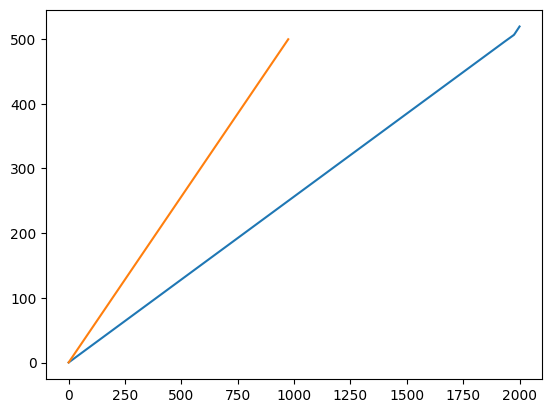

In [17]:
plt.plot(plp)
plt.plot(beat)

In [25]:
signal1 = detection._get_signal_array(audio1)
onset_env = librosa.onset.onset_strength(y=signal1, sr=audio1.frame_rate)
pulse = librosa.beat.plp(onset_envelope=onset_env, sr=audio1.frame_rate)
beats_plp = np.flatnonzero(librosa.util.localmax(pulse))

beats_idx = detection.get_beat_indices(audio1)

In [26]:
beats_plp[:10], beats_idx[:10]

(array([ 11,  33,  56,  78, 100, 123, 145, 167, 189, 211]),
 [13, 58, 101, 146, 190, 234, 279, 322, 366, 409])